## Average_Duration vs Genre

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


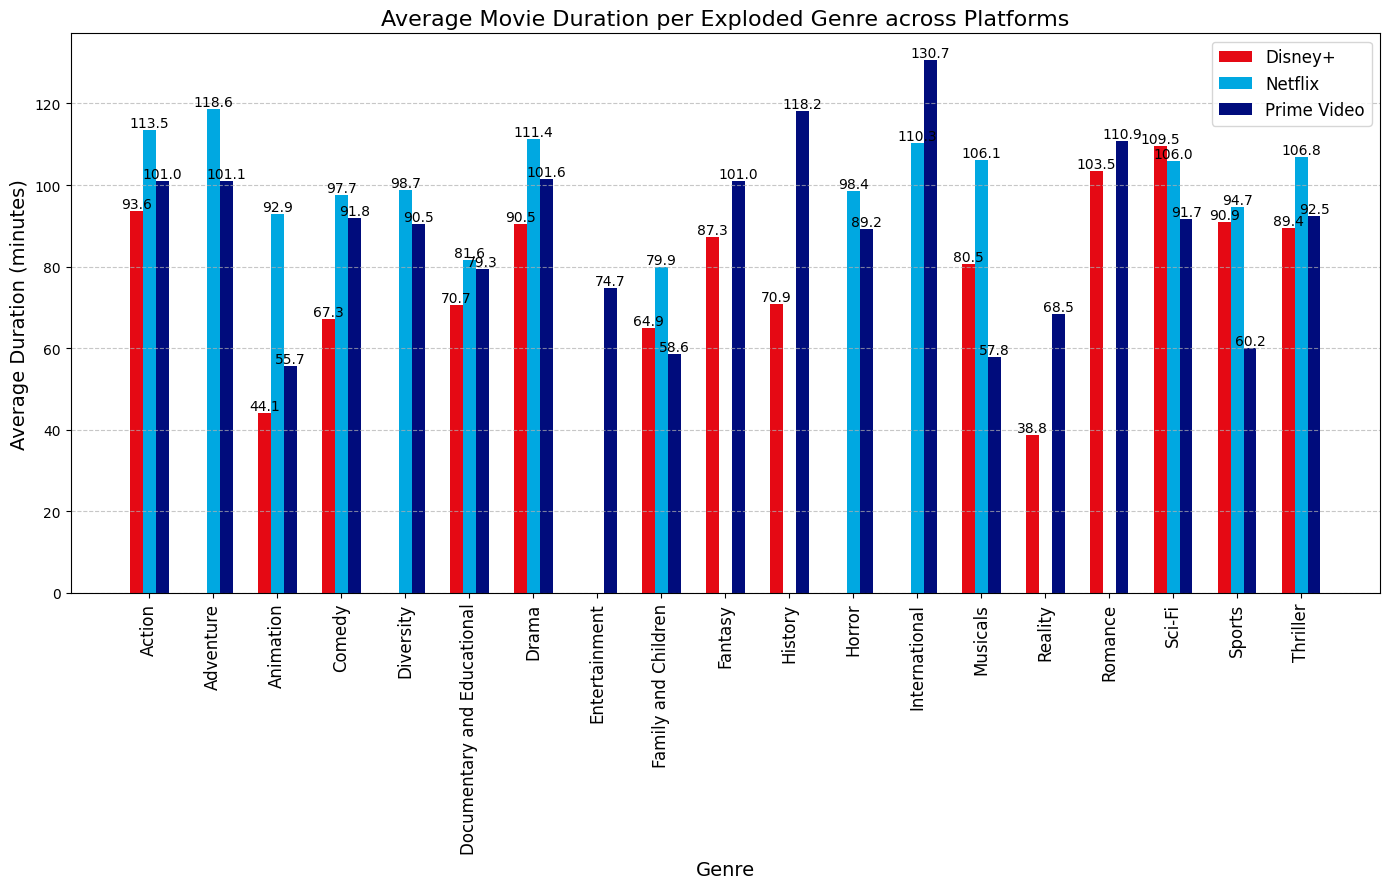

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\data science\Downloads\GitHub_Repositories\OTT_SUGGESTER\data\clean\updated_clean_combined_movies.csv')
# Explode the 'genre' column into separate rows for each genre per movie
exploded_df = df.assign(genre=df['genre'].str.split(', ')).explode('genre')

# Calculate average duration per genre for each platform
avg_durations = exploded_df.groupby(['genre', 'platform'])['duration_min'].mean().unstack()

# Set up plot
genres = avg_durations.index
platforms = avg_durations.columns
n_genres = len(genres)
n_platforms = len(platforms)
fig, ax = plt.subplots(figsize=(14, 9))

# Constants for bar width and positions
bar_width = 0.2
indices = np.arange(n_genres)
colors = ['#E50914', '#00A8E1', '#000c7c']  # Example colors for Netflix, Prime Video, Disney+

for i, platform in enumerate(platforms):
    # Calculate bar positions
    positions = indices - (n_platforms - 1) * bar_width / 2 + i * bar_width
    # Plot bars
    bars = ax.bar(positions, avg_durations[platform], bar_width, label=platform, color=colors[i % len(colors)])
    
    # Add numbers on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, round(height, 1), ha='center', va='bottom', fontsize=10)

# Final plot adjustments
ax.set_title('Average Movie Duration per Exploded Genre across Platforms', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average Duration (minutes)', fontsize=14)
ax.set_xticks(indices)
ax.set_xticklabels(genres, rotation=90, fontsize=12)
ax.legend(platforms, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Total Duration vs Genre

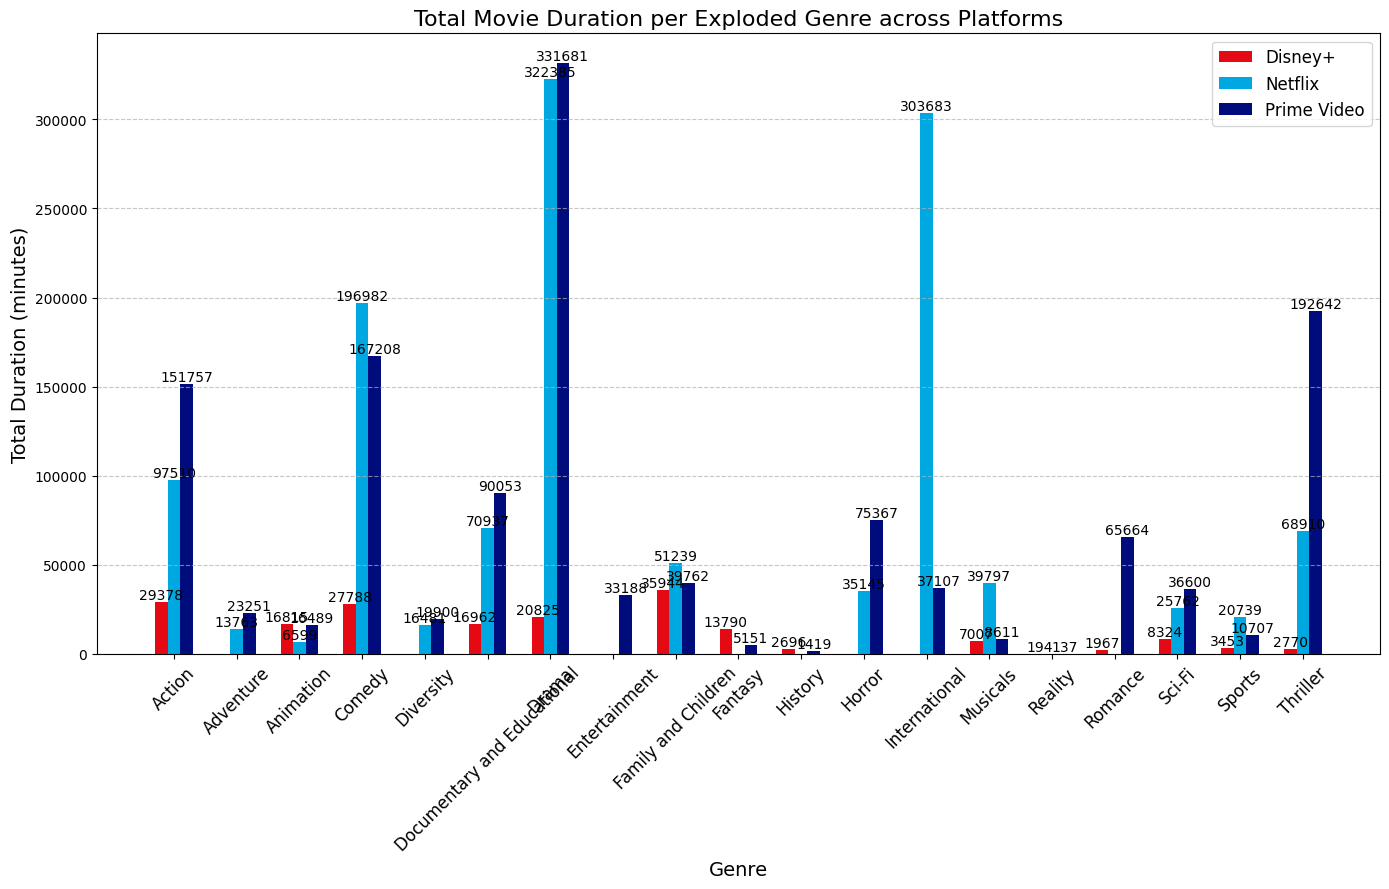

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame after loading the CSV
# Explode the 'genre' column into separate rows for each genre per movie
exploded_df = df.assign(genre=df['genre'].str.split(', ')).explode('genre')

# Calculate total duration per genre for each platform
total_durations = exploded_df.groupby(['genre', 'platform'])['duration_min'].sum().unstack()

# Set up plot
genres = total_durations.index
platforms = total_durations.columns
n_genres = len(genres)
n_platforms = len(platforms)
fig, ax = plt.subplots(figsize=(14, 9))

# Constants for bar width and positions
bar_width = 0.2
indices = np.arange(n_genres)
colors = ['#E50914', '#00A8E1', '#000c7c']  # Example colors for Netflix, Prime Video, Disney+

for i, platform in enumerate(platforms):
    # Calculate bar positions
    positions = indices - (n_platforms - 1) * bar_width / 2 + i * bar_width
    # Plot bars
    bars = ax.bar(positions, total_durations[platform], bar_width, label=platform, color=colors[i % len(colors)])
    
    # Add numbers on top of each bar for clarity, avoiding NaN values
    for bar in bars:
        height = bar.get_height()
        if pd.notnull(height):  # Check if height is not NaN
            ax.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom', fontsize=10)

# Final plot adjustments
ax.set_title('Total Movie Duration per Exploded Genre across Platforms', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Total Duration (minutes)', fontsize=14)
ax.set_xticks(indices)
ax.set_xticklabels(genres, rotation=45, fontsize=12)
ax.legend(platforms, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Duration vs Revenue

#### Histogram

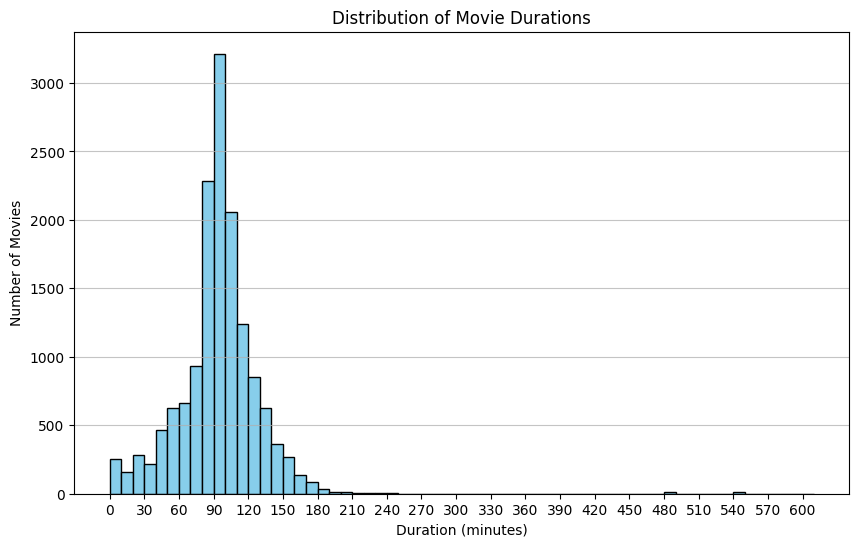

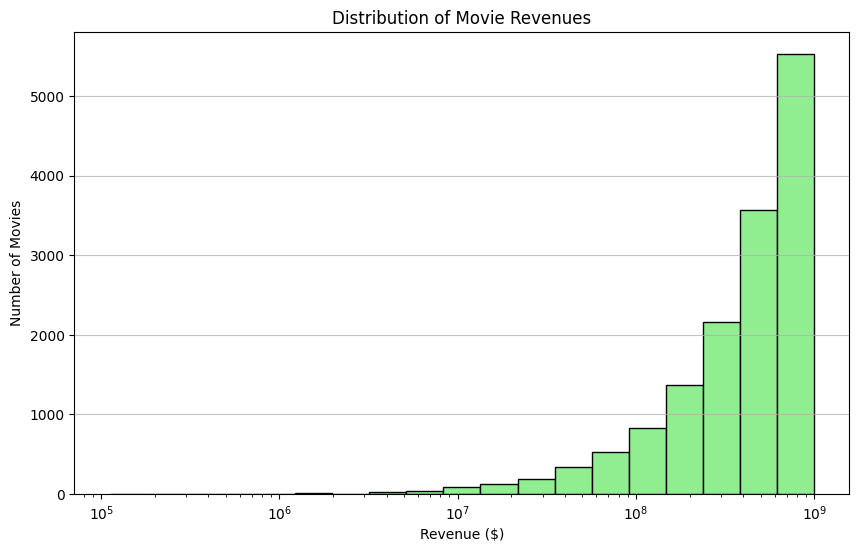

In [9]:
# Histogram for movie durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=range(int(df['duration_min'].min()), int(df['duration_min'].max()) + 10, 10), color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(range(0, int(df['duration_min'].max()) + 10, 30))  # Adjust x-axis ticks
plt.grid(axis='y', alpha=0.75)
plt.show()



# Histogram for movie revenues (log scale)
plt.figure(figsize=(10, 6))
revenue_bins = np.logspace(np.log10(df['revenue'].min()), np.log10(df['revenue'].max()), 20)  # Creating log-spaced bins
plt.hist(df['revenue'], bins=revenue_bins, color='lightgreen', edgecolor='black')
plt.xscale('log')  # Log scale for better visualization
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue ($)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)
plt.show()